<a href="https://colab.research.google.com/github/KSKimmon/KSKimmon/blob/main/Chawa_Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Increase machine learning model accuracy of Cardiovascular diseases datasets

6330140621 Napat Chawakespong


6330348921 Palapol Suetrakoolpanich

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart1.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")
df.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

Getting Column

In [ ]:
string_col=df.select_dtypes("string").columns.to_list()
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

NameError: name 'plt' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


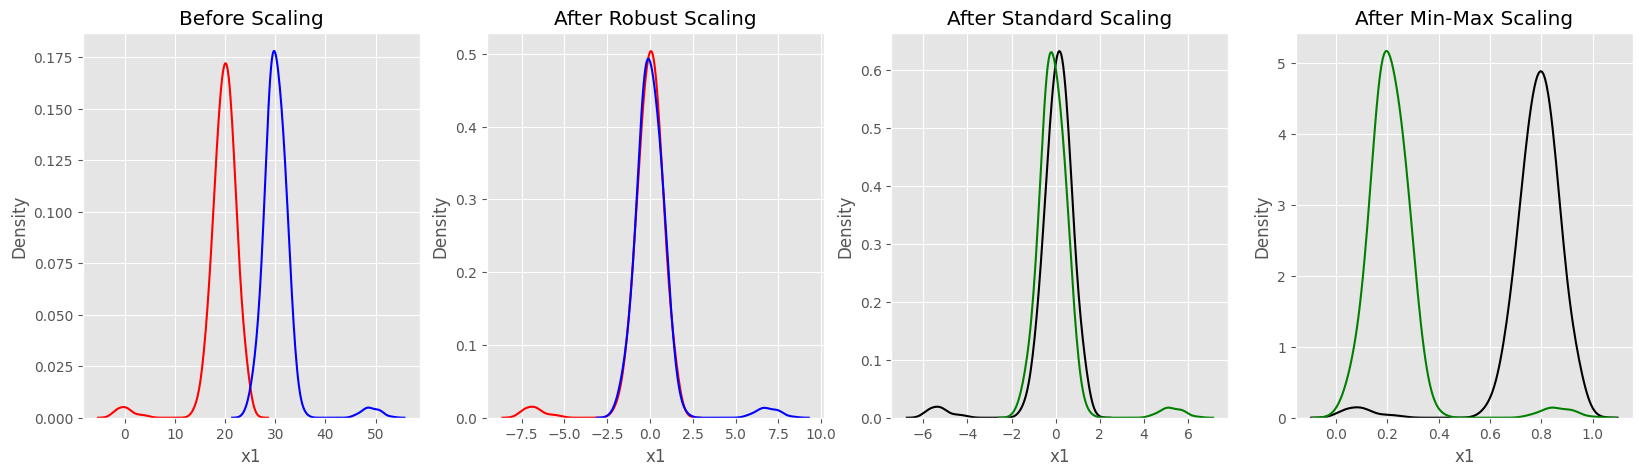

In [ ]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
M    725
F    193
Name: Sex, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
N    547
Y    371
Name: ExerciseAngina, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: Int64


In [ ]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding
# which will be used with Tree Based Algorthms
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [ ]:
## Creaeting one hot encoded features for working with non tree based algorithms
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
# Getting the target column at the end
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


#Logistic Regression

In [ ]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)
def Average(lst):
    return sum(lst) / len(lst)


In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for Fold 1 : 0.8800813008130083
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for Fold 2 : 0.8531802965088474
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                       

In [ ]:
print(Average(acc_log))

0.8287895791013822


# K-fold Logistic Regression

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

def Average(lst):
    return sum(lst) / len(lst)

acc_aver_log=[]
for i in range(2,51):
  acc_log = []
  kf=model_selection.StratifiedKFold(n_splits=i)
  for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

      X_train=df_nontree.loc[trn_,feature_col_nontree]
      y_train=df_nontree.loc[trn_,target]

      X_valid=df_nontree.loc[val_,feature_col_nontree]
      y_valid=df_nontree.loc[val_,target]

      #print(pd.DataFrame(X_valid).head())
      ro_scaler=MinMaxScaler()
      X_train=ro_scaler.fit_transform(X_train)
      X_valid=ro_scaler.transform(X_valid)

      clf=LogisticRegression()
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_valid)
      #print(f"The fold is : {fold} : ")
      #print(classification_report(y_valid,y_pred))
      acc=roc_auc_score(y_valid,y_pred)
      acc_log.append(acc)
      #print(f"The accuracy for Fold {fold+1} : {acc}")
      pass
  acc_aver_log.append(Average(acc_log))
print(acc_aver_log)

[0.8213222584981755, 0.8317137045722275, 0.8367572298394169, 0.8287895791013822, 0.8467350708399302, 0.8409774953617976, 0.8451886463720104, 0.8445160304141999, 0.8455404112864657, 0.844462288020884, 0.8545846633226936, 0.8515618040974741, 0.8456532271187444, 0.8479543332484508, 0.8504283304900745, 0.8490551048005409, 0.8516856290469483, 0.8507267586214955, 0.8509322344322345, 0.8527192982456142, 0.8532319765157297, 0.8526797497941719, 0.8546467829556067, 0.8507198879551819, 0.8541118421052629, 0.8527371669915526, 0.8532566535386087, 0.8522006503750924, 0.8533054567981038, 0.8519122599411973, 0.8539162660256411, 0.8525932400932401, 0.854400991165697, 0.8557081014223871, 0.8515572390572391, 0.8522254772254773, 0.8544823597455176, 0.8524821332513641, 0.8527199883449883, 0.8544871794871792, 0.854563492063492, 0.8540873854827342, 0.8510904499540863, 0.8524017957351289, 0.8552508783487044, 0.855289598108747, 0.8546533038720537, 0.8499896928468356, 0.8521565656565657]


In [ ]:
print((max(acc_aver_log)))
print(acc_aver_log.index((max(acc_aver_log)))+1)
print(acc_aver_log.index(0.8545846633226936)+1)

0.8557081014223871
34
11


In [ ]:
k_value = []
for i in range(2,51):
  k_value.append(i)
print(k_value)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


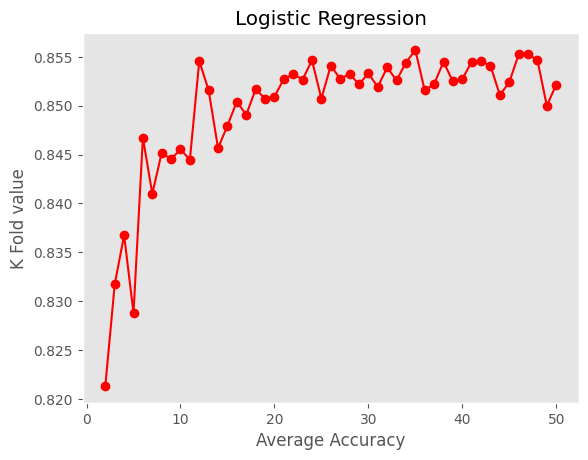

In [ ]:
plt.plot(k_value,acc_aver_log,'ro-')
plt.title("Logistic Regression")
plt.xlabel("Average Accuracy")
plt.ylabel("K Fold value")
plt.grid(False)

# Naive Bayers

In [ ]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass
print(Average(acc_Gauss))

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        82
           1       0.93      0.79      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

The accuracy for 1 : 0.8604734576757532
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        82
           1       0.93      0.85      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

The accuracy for 2 : 0.8837876614060258
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        82
           1       0.77      0.98      0.86       102

    accuracy                           0.83  

# K-fold Naive Bayers

In [ ]:
from sklearn.naive_bayes import GaussianNB
acc_aver_Gauss=[]
for i in range(2,51):
  acc_Gauss=[]
  kf=model_selection.StratifiedKFold(n_splits=i)
  for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

      X_train=df_nontree.loc[trn_,feature_col_nontree]
      y_train=df_nontree.loc[trn_,target]

      X_valid=df_nontree.loc[val_,feature_col_nontree]
      y_valid=df_nontree.loc[val_,target]

      ro_scaler=MinMaxScaler()
      X_train=ro_scaler.fit_transform(X_train)
      X_valid=ro_scaler.transform(X_valid)

      clf=GaussianNB()
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_valid)
      #print(f"The fold is : {fold} : ")
      #print(classification_report(y_valid,y_pred))
      acc=roc_auc_score(y_valid,y_pred)
      acc_Gauss.append(acc)
      #print(f"The accuracy for {fold+1} : {acc}")

      pass
  acc_aver_Gauss.append(Average(acc_Gauss))
print(acc_aver_Gauss)

[0.8327923948530824, 0.828466274645305, 0.8436588915820131, 0.8360969454190755, 0.8427668168716762, 0.8424477632738243, 0.8483709088603391, 0.8459869984946262, 0.8502142515542804, 0.8516293028197212, 0.8550623737867239, 0.8521026197747662, 0.8505987514608206, 0.8541931924284866, 0.8525362515508685, 0.8532555780933064, 0.8529678613074414, 0.8547914074229865, 0.8539935897435897, 0.85187134502924, 0.8586826503016436, 0.856910032157447, 0.8585885111620405, 0.8540392156862745, 0.8565325573549253, 0.8550763482781027, 0.8558897243107768, 0.8552834927074277, 0.8569092059900882, 0.8561406572554581, 0.8551532451923077, 0.8559683372183373, 0.8565018315018315, 0.8581663574520718, 0.8529611592111591, 0.8567479817479816, 0.8572151532677849, 0.8550283050283051, 0.8542744755244757, 0.8553783614759222, 0.8559930809930814, 0.8547509983556495, 0.8559974747474747, 0.8566947250280583, 0.8563899868247696, 0.856979368149581, 0.8563578493265993, 0.8527004741290455, 0.8544065656565657]


In [ ]:
print((max(acc_aver_Gauss)))
print(acc_aver_Gauss.index((max(acc_aver_Gauss)))+1)
print(acc_aver_Gauss.index(0.8550623737867239)+1)

0.8586826503016436
21
11


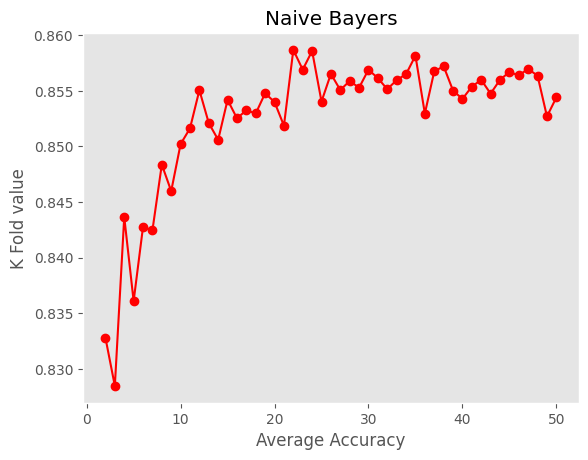

In [ ]:
plt.plot(k_value,acc_aver_Gauss,'ro-')
plt.title("Naive Bayers")
plt.xlabel("Average Accuracy")
plt.ylabel("K Fold value")
plt.grid(False)

# Support Vector Machines

In [ ]:
# Using Linear Kernel
from sklearn.svm import SVC
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass
print(Average(acc_svm))

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        82
           1       0.92      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for 1 : 0.8690817790530847
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83  

# K-fold SVM Linear

In [ ]:
# Using Linear Kernel
from sklearn.svm import SVC
acc_aver_svm=[]
for i in range(2,51):
  acc_svm=[]
  kf=model_selection.StratifiedKFold(n_splits=i)
  for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

      X_train=df_nontree.loc[trn_,feature_col_nontree]
      y_train=df_nontree.loc[trn_,target]

      X_valid=df_nontree.loc[val_,feature_col_nontree]
      y_valid=df_nontree.loc[val_,target]

      ro_scaler=MinMaxScaler()
      X_train=ro_scaler.fit_transform(X_train)
      X_valid=ro_scaler.transform(X_valid)

      clf=SVC(kernel="linear")
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_valid)
      #print(f"The fold is : {fold} : ")
      #print(classification_report(y_valid,y_pred))
      acc=roc_auc_score(y_valid,y_pred)
      acc_svm.append(acc)
      #print(f"The accuracy for {fold+1} : {acc}")

      pass
  acc_aver_svm.append(Average(acc_svm))
print(acc_aver_svm)

[0.8090215095064336, 0.8180061047439752, 0.8379827200354952, 0.822419279230649, 0.8415824300734785, 0.8480718577298523, 0.8403803228021978, 0.8381134498888123, 0.8393797226207556, 0.8431154764837029, 0.8548881180379128, 0.8513637701215243, 0.8472063196201126, 0.849531260315574, 0.8489905784739454, 0.8508198106828938, 0.8521376487081136, 0.8545431177010122, 0.8562206959706959, 0.8535421888053468, 0.8544946027783555, 0.8565654880844472, 0.8547148657442776, 0.8558410364145657, 0.8599907219973008, 0.8544401126272473, 0.8579051796157061, 0.8558421069577257, 0.8554150506356388, 0.8558708843338824, 0.8552183493589743, 0.856667637917638, 0.8604476405946996, 0.8614687693259122, 0.8562770562770565, 0.8602118602118601, 0.8587544034912454, 0.8561489792259024, 0.8599023892773895, 0.8610850531582236, 0.8636243386243387, 0.8608703312191686, 0.8586317722681358, 0.858080808080808, 0.8596426218708829, 0.8642999140339568, 0.8630366161616161, 0.8550505050505051, 0.8577525252525252]


In [ ]:
print((max(acc_aver_svm)))
print(acc_aver_svm.index((max(acc_aver_svm)))+1)
print(acc_aver_svm.index(0.8548881180379128)+1)

0.8642999140339568
46
11


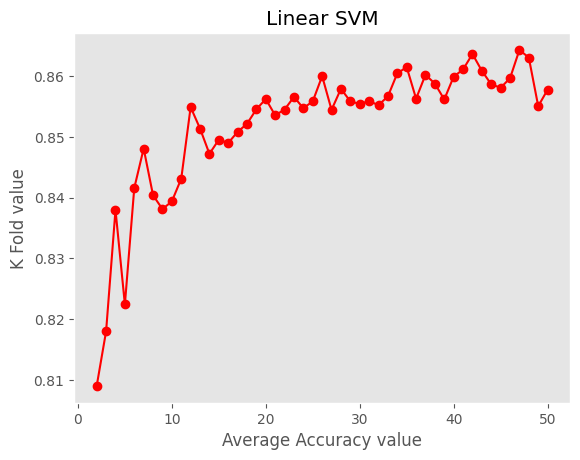

In [ ]:
plt.plot(k_value,acc_aver_svm,'ro-')
plt.title("Linear SVM")
plt.xlabel("Average Accuracy value")
plt.ylabel("K Fold value")
plt.grid(False)

# K-fold SVM Sigmoid

In [ ]:
## Using Sigmoid Kernel
from sklearn.svm import SVC
acc_svm_sig=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel="sigmoid")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    pass



The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        82
           1       0.87      0.86      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

The accuracy for 1 : 0.852104256336681
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        82
           1       0.80      0.75      0.77       102

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.76      0.76       184

The accuracy for 2 : 0.7566953610712578
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.85      0.73      0.78        82
           1       0.81      0.89      0.85       102

    accuracy                           0.82   

In [ ]:
## Using Sigmoid Kernel
from sklearn.svm import SVC
acc_aver_svm_sig = []
for i in range(2,51):
  acc_svm_sig=[]
  kf=model_selection.StratifiedKFold(n_splits=i)
  for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

      X_train=df_nontree.loc[trn_,feature_col_nontree]
      y_train=df_nontree.loc[trn_,target]

      X_valid=df_nontree.loc[val_,feature_col_nontree]
      y_valid=df_nontree.loc[val_,target]

      ro_scaler=MinMaxScaler()
      X_train=ro_scaler.fit_transform(X_train)
      X_valid=ro_scaler.transform(X_valid)

      clf=SVC(kernel="sigmoid")
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_valid)
      #print(f"The fold is : {fold} : ")
      #print(classification_report(y_valid,y_pred))
      acc=roc_auc_score(y_valid,y_pred)
      acc_svm_sig.append(acc)
      #print(f"The accuracy for {fold+1} : {acc}")

      pass
  acc_aver_svm_sig.append(Average(acc_svm_sig))
print(acc_aver_svm_sig)

[0.8140483963894757, 0.7934694546846509, 0.775585585889428, 0.78730982854383, 0.792582612755247, 0.7893779541177921, 0.7698445664323422, 0.7774645450179394, 0.7831343854615016, 0.778777517165462, 0.8043810935226804, 0.7811052522746073, 0.7703359147324665, 0.7650392817059484, 0.7925082389888337, 0.7863133874239352, 0.7809478648121826, 0.7734448787080366, 0.7906904761904763, 0.7939807852965747, 0.7864695293900099, 0.7905143955961258, 0.7794374062756417, 0.7807647058823529, 0.770883940620783, 0.800549599306909, 0.7912922186418426, 0.788990308767185, 0.7862543094160742, 0.7978736159476194, 0.7962590144230769, 0.7783459595959595, 0.7892049127343244, 0.7875881261595546, 0.7853715728715729, 0.7875052875052877, 0.7874125874125872, 0.7888816311893233, 0.7898892773892773, 0.7949186991869915, 0.7959198209198209, 0.791425886774724, 0.790220385674931, 0.7975645342312011, 0.7979660737812911, 0.7967494089834516, 0.7957517887205388, 0.7982323232323234, 0.8002979797979797]


In [ ]:
print((max(acc_aver_svm_sig)))
print(acc_aver_svm_sig.index((max(acc_aver_svm_sig)))+1)
print(acc_aver_svm_sig.index(0.8043810935226804)+1)

0.8140483963894757
1
11


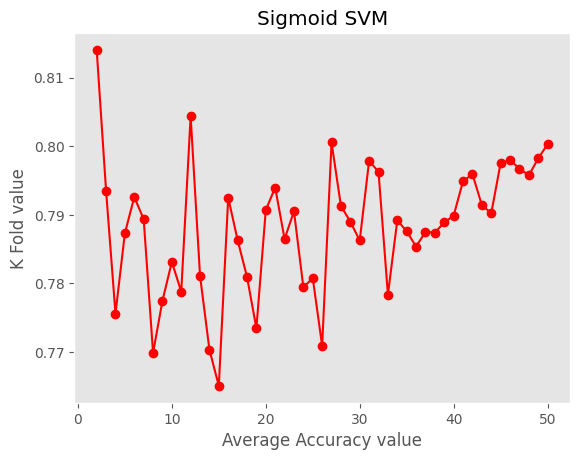

In [ ]:
plt.plot(k_value,acc_aver_svm_sig,'ro-')
plt.title("Sigmoid SVM")
plt.xlabel("Average Accuracy value")
plt.ylabel("K Fold value")
plt.grid(False)

# K-fold RBF

In [ ]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_rbf.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass
print(Average(acc_svm_rbf))

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        82
           1       0.91      0.93      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

The accuracy for 1 : 0.9108082257293162
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        82
           1       0.79      0.93      0.86       102

    accuracy                           0.83  

In [ ]:
## Using RBF kernel
from sklearn.svm import SVC
acc_aver_svm_rbf = []
for i in range(2,51):
  acc_svm_rbf=[]
  kf=model_selection.StratifiedKFold(n_splits=i)
  for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

      X_train=df_nontree.loc[trn_,feature_col_nontree]
      y_train=df_nontree.loc[trn_,target]

      X_valid=df_nontree.loc[val_,feature_col_nontree]
      y_valid=df_nontree.loc[val_,target]

      ro_scaler=MinMaxScaler()
      X_train=ro_scaler.fit_transform(X_train)
      X_valid=ro_scaler.transform(X_valid)

      clf=SVC(kernel="rbf")
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_valid)
      #print(f"The fold is : {fold} : ")
      #print(classification_report(y_valid,y_pred))
      acc=roc_auc_score(y_valid,y_pred)
      acc_svm_rbf.append(acc)
      #print(f"The accuracy for {fold+1} : {acc}")

      pass
  acc_aver_svm_rbf.append(Average(acc_svm_rbf))

print(acc_aver_svm_rbf)

[0.812382369886691, 0.8163916843029702, 0.8407878287772566, 0.8239548560307967, 0.8225119758048147, 0.8371470149725077, 0.8410494606496444, 0.8306966086714369, 0.8324041128646581, 0.8424954838120037, 0.8430984409267582, 0.8488646847362727, 0.848833007884732, 0.8468916522838091, 0.8557905552109181, 0.8406000676132522, 0.8428522481183651, 0.8521400626663783, 0.8573012820512822, 0.855169172932331, 0.8588112243718652, 0.8538683847257184, 0.8565097756274228, 0.8588809523809523, 0.8615806342780026, 0.8586974767164824, 0.8594551855830053, 0.8581538362471426, 0.8600187190260716, 0.8567577465229269, 0.8618990384615385, 0.8581876456876458, 0.8604126265890972, 0.8541496598639456, 0.8586790524290525, 0.8573239823239824, 0.8631947000368053, 0.8593227285534979, 0.8597916666666668, 0.8582238899312069, 0.8606583231583236, 0.8586445853887715, 0.8601067493112947, 0.859242424242424, 0.8630050505050507, 0.8605496453900711, 0.8602982954545455, 0.8620336013193157, 0.8616414141414142]


In [ ]:
print((max(acc_aver_svm_rbf)))
print(acc_aver_svm_rbf.index((max(acc_aver_svm_rbf)))+1)
print(acc_aver_svm_rbf.index(0.8557905552109181)+1)

0.8631947000368053
37
15


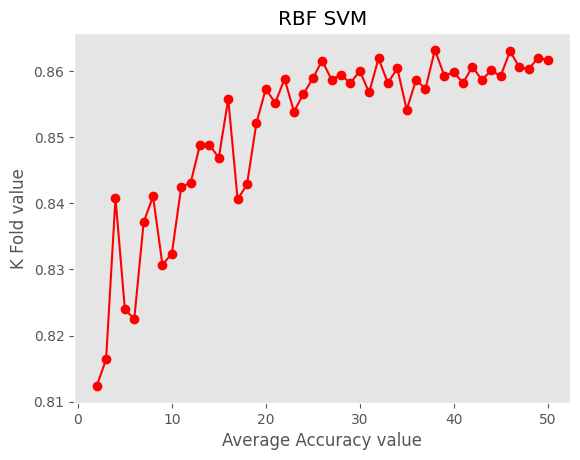

In [ ]:
plt.plot(k_value,acc_aver_svm_rbf,'ro-')
plt.title("RBF SVM")
plt.xlabel("Average Accuracy value")
plt.ylabel("K Fold value")
plt.grid(False)

# K-fold Poly

In [ ]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass
print(Average(acc_svm_poly))

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        82
           1       0.92      0.89      0.91       102

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

The accuracy for 1 : 0.897297943567671
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.93      0.63      0.75        82
           1       0.77      0.96      0.85       102

    accuracy                           0.82   

In [ ]:
## Using RBF kernel
from sklearn.svm import SVC
acc_aver_svm_poly = []
for i in range(2,51):
  acc_svm_poly=[]
  kf=model_selection.StratifiedKFold(n_splits=i)
  for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

      X_train=df_nontree.loc[trn_,feature_col_nontree]
      y_train=df_nontree.loc[trn_,target]

      X_valid=df_nontree.loc[val_,feature_col_nontree]
      y_valid=df_nontree.loc[val_,target]

      ro_scaler=MinMaxScaler()
      X_train=ro_scaler.fit_transform(X_train)
      X_valid=ro_scaler.transform(X_valid)

      clf=SVC(kernel="poly")
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_valid)
      #print(f"The fold is : {fold} : ")
      #print(classification_report(y_valid,y_pred))
      acc=roc_auc_score(y_valid,y_pred)
      acc_svm_poly.append(acc)
      #print(f"The accuracy for {fold+1} : {acc}")

      pass
  acc_aver_svm_poly.append(Average(acc_svm_poly))
print(acc_aver_svm_poly)

[0.8185855579028231, 0.8107749768589682, 0.8400329170732587, 0.81825338200965, 0.8278863719400804, 0.8376523992141712, 0.8537985707103353, 0.8333814104504418, 0.8402625538020085, 0.8533173181768536, 0.853358358847415, 0.854004421963479, 0.8451042175180105, 0.8478324326363542, 0.8543196533808933, 0.8464824205544286, 0.8474984639714775, 0.8526595237121551, 0.8608397435897437, 0.854596908939014, 0.8575254836696484, 0.8546841145807009, 0.8554593554593555, 0.8499285714285714, 0.861880060728745, 0.8582426359107644, 0.8581707244301231, 0.8592404778003154, 0.8576505602240896, 0.8523605782263276, 0.8585386618589744, 0.8509906759906762, 0.8564910579616463, 0.8559863945578232, 0.8549813612313613, 0.8560347310347308, 0.8589581471160422, 0.8555572632495713, 0.8546955128205129, 0.8559412132582866, 0.8548382173382175, 0.8539053323937046, 0.85393709825528, 0.8576150392817059, 0.8604797979797979, 0.8620164410058029, 0.8613347011784515, 0.8543805400948258, 0.8568232323232323]


In [ ]:
print((max(acc_aver_svm_poly)))
print(acc_aver_svm_poly.index((max(acc_aver_svm_poly)))+1)
print(acc_aver_svm_poly.index(0.8451042175180105)+1)

0.8620164410058029
46
13


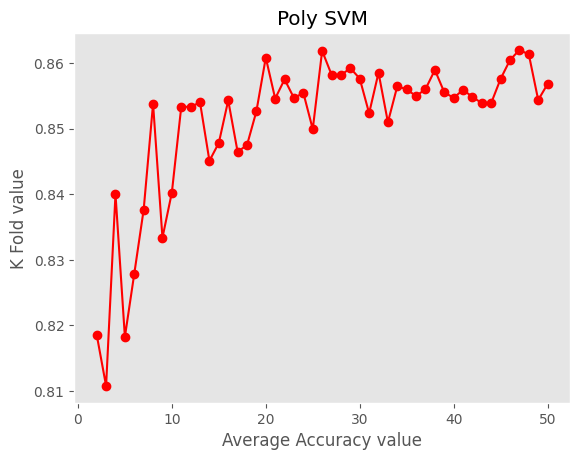

In [ ]:
plt.plot(k_value,acc_aver_svm_poly,'ro-')
plt.title("Poly SVM")
plt.xlabel("Average Accuracy value")
plt.ylabel("K Fold value")
plt.grid(False)

# K-nearest Neighbors

In [ ]:
## Using RBF kernel
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass
print(Average(acc_KNN))

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        82
           1       0.93      0.93      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

The accuracy for 1 : 0.9230033476805357
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        82
           1       0.91      0.79      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8482783357245336
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        82
           1       0.81      0.95      0.87       102

    accuracy                           0.85  

# K-fold KNN

In [ ]:
## Using RBF kernel
from sklearn.neighbors import KNeighborsClassifier
acc_aver_KNN=[]
for i in range(2,51):
  acc_KNN=[]
  kf=model_selection.StratifiedKFold(n_splits=i)
  for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

      X_train=df_nontree.loc[trn_,feature_col_nontree]
      y_train=df_nontree.loc[trn_,target]

      X_valid=df_nontree.loc[val_,feature_col_nontree]
      y_valid=df_nontree.loc[val_,target]

      ro_scaler=MinMaxScaler()
      X_train=ro_scaler.fit_transform(X_train)
      X_valid=ro_scaler.transform(X_valid)

      clf=KNeighborsClassifier(n_neighbors=32)
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_valid)
      #print(f"The fold is : {fold} : ")
      #print(classification_report(y_valid,y_pred))
      acc=roc_auc_score(y_valid,y_pred)
      acc_KNN.append(acc)
      #print(f"The accuracy for {fold+1} : {acc}")

      pass
  acc_aver_KNN.append(Average(acc_KNN))
print(acc_aver_KNN)

[0.8362156712118303, 0.8482445103035815, 0.8468602868102367, 0.8425202778527494, 0.8477682377298746, 0.8459028015263653, 0.8497868297960209, 0.8493201098559603, 0.84851649928264, 0.8494927191309685, 0.8521076259961348, 0.8534884599478273, 0.8483056332194263, 0.8470642465740507, 0.8523245580024814, 0.846154496281271, 0.8497367928589817, 0.8531083925820767, 0.8543516483516485, 0.8507644110275688, 0.851299031504981, 0.8539759318976489, 0.8471019721019721, 0.846733893557423, 0.8517037786774626, 0.8558357699805067, 0.8537206110514383, 0.8519044399368942, 0.8500444408532642, 0.8504747742769565, 0.8527794471153849, 0.8479555167055167, 0.8494640163757811, 0.8521490414347557, 0.8499669312169315, 0.8539748539748542, 0.8533979178716024, 0.8547145162529776, 0.8537004662004662, 0.8557066916823014, 0.8564356939356941, 0.856512802443035, 0.8507001836547292, 0.8540123456790122, 0.8583937198067632, 0.8591553836234687, 0.8578256523569024, 0.8499226963512678, 0.8523207070707071]


In [ ]:
print((max(acc_aver_KNN)))
print(acc_aver_KNN.index((max(acc_aver_KNN)))+1)
print(acc_aver_KNN.index(0.8534884599478273)+1)

0.8591553836234687
46
12


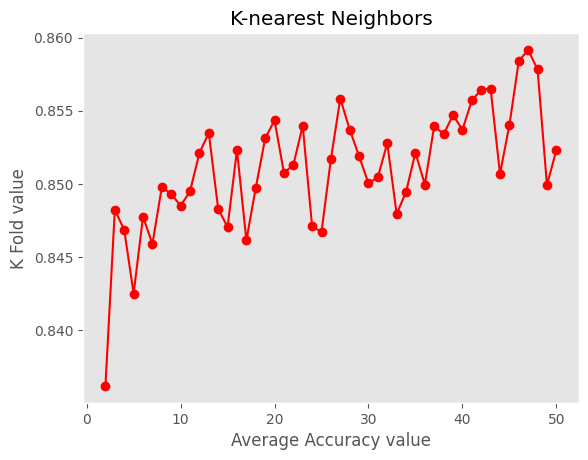

In [ ]:
plt.plot(k_value,acc_aver_KNN,'ro-')
plt.title("K-nearest Neighbors")
plt.xlabel("Average Accuracy value")
plt.ylabel("K Fold value")
plt.grid(False)

# Tree Base Algorithm

In [ ]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]

    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
print(Average(acc_Dtree))

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.67      0.87      0.76        82
           1       0.86      0.66      0.74       102

    accuracy                           0.75       184
   macro avg       0.76      0.76      0.75       184
weighted avg       0.77      0.75      0.75       184

The accuracy for 1 : 0.7613582018173123
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.69      0.88      0.77        82
           1       0.87      0.68      0.76       102

    accuracy                           0.77       184
   macro avg       0.78      0.78      0.77       184
weighted avg       0.79      0.77      0.77       184

The accuracy for 2 : 0.7772596843615496
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.85      0.62      0.72        82
           1       0.75      0.91      0.82       102

    accuracy                           0.78  

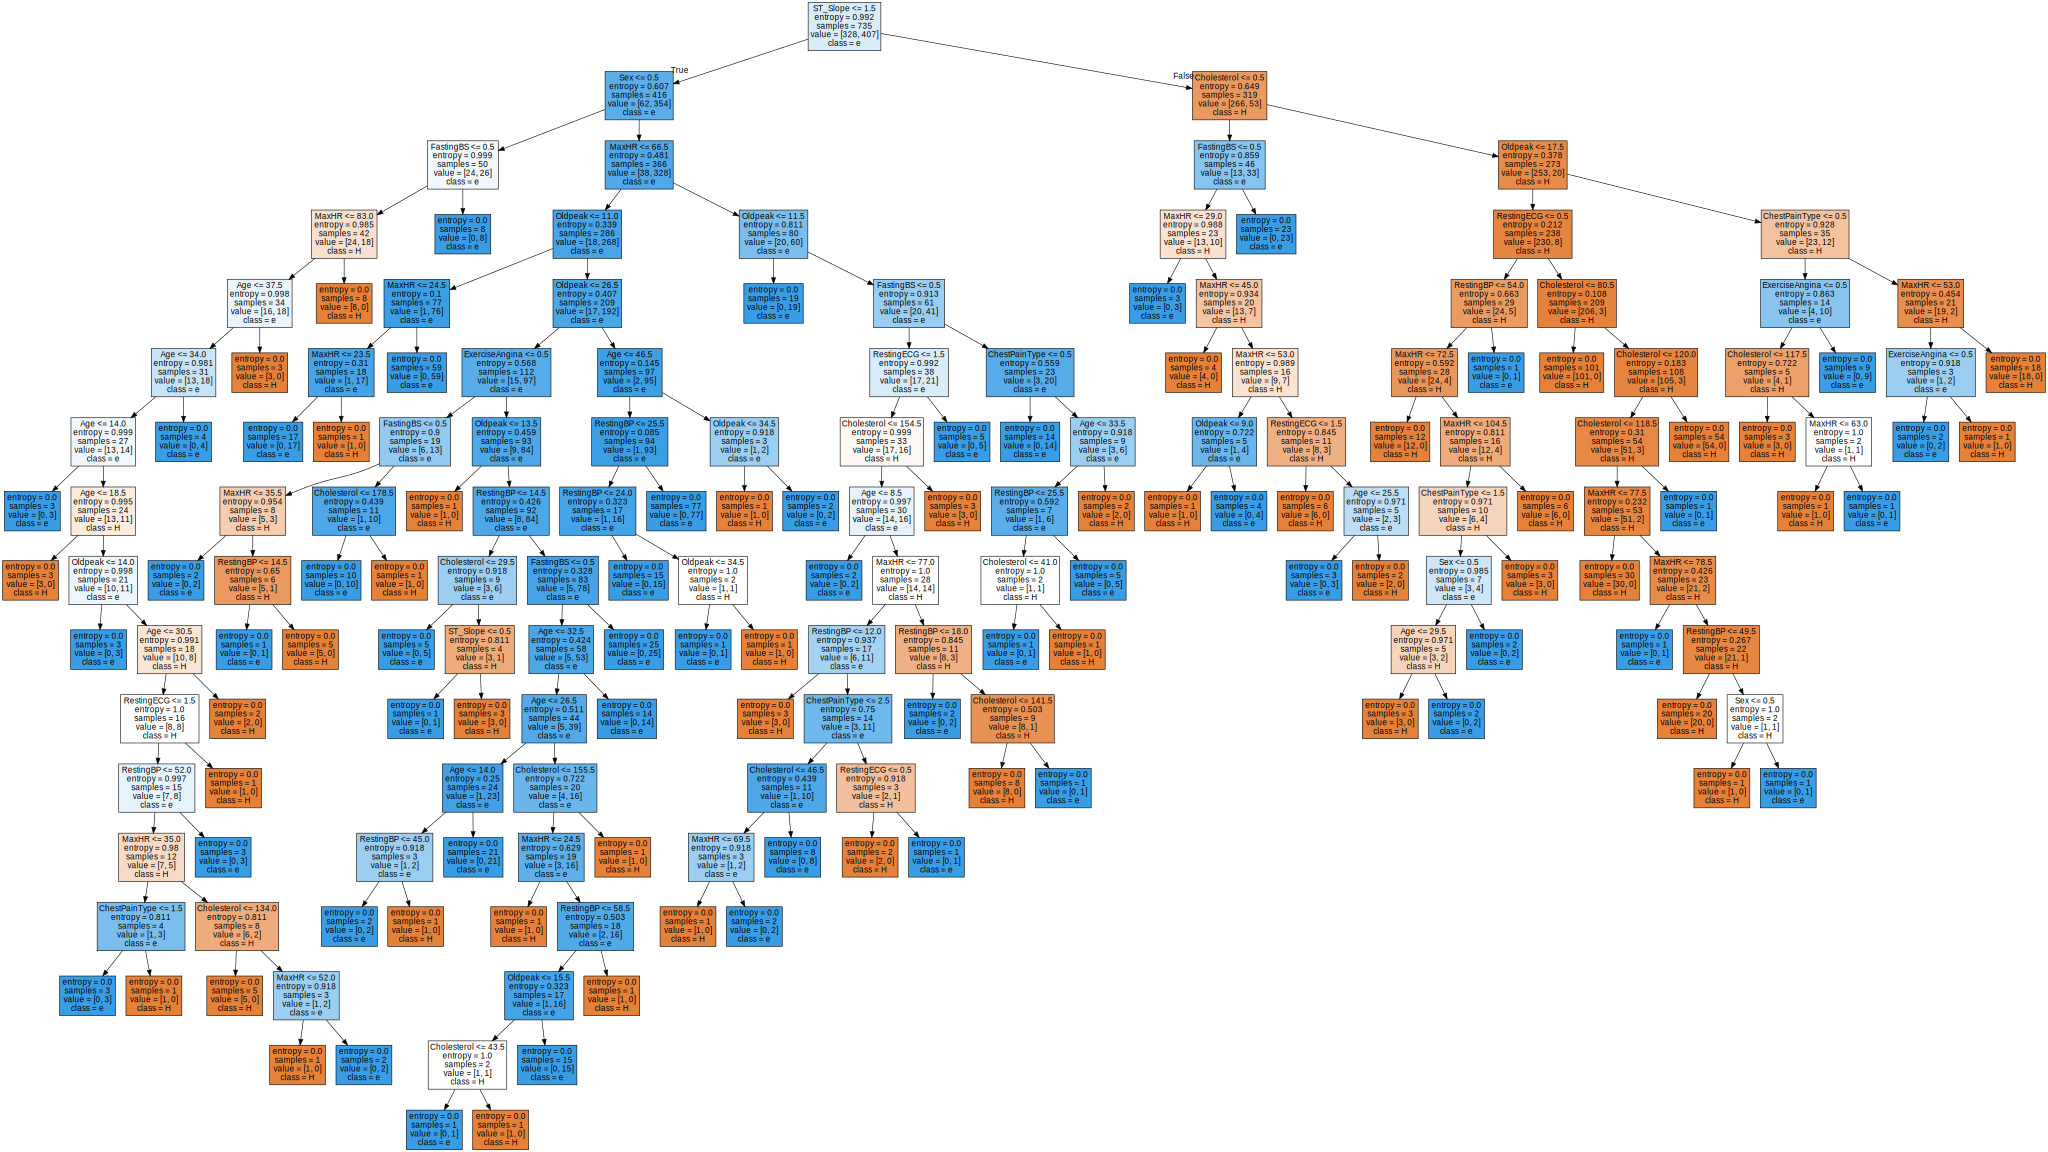

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_col_tree,
                                class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

# K-fold Tree

In [ ]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)
from sklearn.tree import DecisionTreeClassifier
acc_aver_Dtree = []

for i in range(2,51):
  acc_Dtree = []
  kf=model_selection.StratifiedKFold(n_splits=i)
  for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

      X_train=df_tree.loc[trn_,feature_col_tree]
      y_train=df_tree.loc[trn_,target]

      X_valid=df_tree.loc[val_,feature_col_tree]
      y_valid=df_tree.loc[val_,target]

      clf=DecisionTreeClassifier(criterion="entropy")
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_valid)
      #print(f"The fold is : {fold} : ")
      #print(classification_report(y_valid,y_pred))
      acc=roc_auc_score(y_valid,y_pred)
      acc_Dtree.append(acc)
      #print(f"The accuracy for {fold+1} : {acc}")
  acc_aver_Dtree.append(Average(acc_Dtree))
print(acc_aver_Dtree)


[0.7632753985020166, 0.7885827271780306, 0.7758628927452029, 0.7451373401328654, 0.7786754556895222, 0.7593965218596932, 0.7755802841970122, 0.7676809273586542, 0.7875102821616452, 0.7785622199176901, 0.7869302759863636, 0.7815619631609086, 0.7785329664640007, 0.7901071876562072, 0.7989159429280397, 0.8036663286004055, 0.7797671780992619, 0.7940242019189389, 0.7987142857142856, 0.7923830409356727, 0.776235611261355, 0.7831503627400436, 0.7991168689698102, 0.7840042016806723, 0.7906545209176786, 0.7974009096816116, 0.7953559493973027, 0.7825831482018093, 0.7882164404223228, 0.7985747648935504, 0.7885216346153846, 0.7882430069930071, 0.802510234863176, 0.7934755720470007, 0.7910293410293412, 0.797881172881173, 0.7845404595404595, 0.7873856912318452, 0.7773732517482517, 0.7931519699812384, 0.7879171754171753, 0.7897639182522905, 0.7805670339761247, 0.7968742985409653, 0.7870004391743524, 0.7876262626262627, 0.7886468855218856, 0.7877319109461965, 0.7867575757575755]


In [ ]:
print((max(acc_aver_Dtree)))
print(acc_aver_Dtree.index((max(acc_aver_Dtree)))+1)
#print(acc_aver_Dtree.index(0.8534884599478273)+1)

0.8036663286004055
16


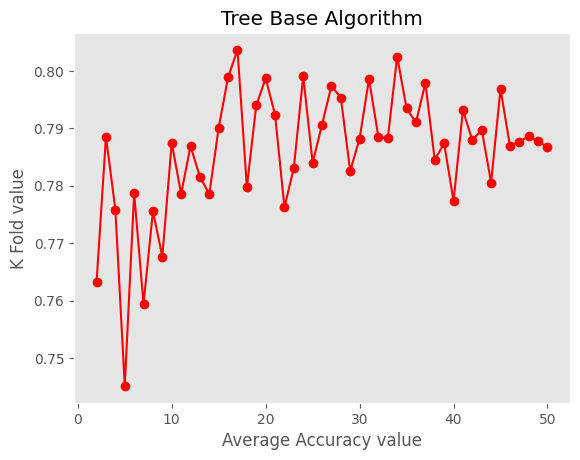

In [ ]:
plt.plot(k_value,acc_aver_Dtree,'ro-')
plt.title("Tree Base Algorithm")
plt.xlabel("Average Accuracy value")
plt.ylabel("K Fold value")
plt.grid(False)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]

    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
print(Average(acc_RandF))

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        82
           1       0.92      0.81      0.86       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for 1 : 0.864179818268771
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for 2 : 0.8531802965088474
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.98      0.62      0.76        82
           1       0.77      0.99      0.86       102

    accuracy                           0.83   

# K-fold Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
acc_aver_RandF = []
for i in range(2,51):
  acc_RandF=[]
  kf=model_selection.StratifiedKFold(n_splits=i)
  for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

      X_train=df_tree.loc[trn_,feature_col_tree]
      y_train=df_tree.loc[trn_,target]

      X_valid=df_tree.loc[val_,feature_col_tree]
      y_valid=df_tree.loc[val_,target]

      clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_valid)
      #print(f"The fold is : {fold} : ")
      #print(classification_report(y_valid,y_pred))
      acc=roc_auc_score(y_valid,y_pred)
      acc_RandF.append(acc)
      #print(f"The accuracy for {fold+1} : {acc}")
  acc_aver_RandF.append(Average(acc_RandF))
print(acc_aver_RandF)

KeyboardInterrupt: ignored

In [ ]:
print((max(acc_aver_RandF)))
print(acc_aver_RandF.index((max(acc_aver_RandF)))+1)
print(acc_aver_RandF.index(0.8649405575531495)+1)

In [ ]:
plt.plot(k_value,acc_aver_RandF,'ro-')
plt.title("Random Forest Classifier")
plt.xlabel("Average Accuracy value")
plt.ylabel("K Fold value")
plt.grid(False)

In [ ]:
## Checking Feature importance

plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

# XGBoost
XGBoost (eXtreme Gradient Boosting) is an optimized and scalable implementation of gradient boosting for tree-based models. It is designed for both efficiency and performance and is widely used for large-scale machine learning tasks such as classification and regression.

XGBoost is notable for its parallel processing capabilities, its ability to handle missing data, and its advanced features for model tuning. Additionally, it provides a flexible and expressive syntax for defining models, making it accessible to both novice and expert users.

**Hyperparameters Tuning**
- Tree-specific parameters : *max_depth,min_child_weight, gamma, subsample, colsample_bytree*
- Regularization parameters : *lambda, alpha*
- Learning rate

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_test1 = {
   # 'max_depth' : range(3,10,1),
    #'min_child_weight' : range(0,20,1),
    #'gamma' : [i/10 for i in range(0,10)],
    #'subsample' : [i/10 for i in range(5,10)],
    #'colsample_bytree' : [i/10 for i in range(5,10)],
    #'alpha' : [1e-5, 1e-2, 0.1, 1 ,100],
    #'lambda' : [1e-5, 1e-2, 0.1, 1 ,100],
    #'learning_rate' : [0.1,0.01,0.001]
    #'n_estimators' : [1,10,50,100,500,1000]
}
X_train=df_tree.loc[trn_,feature_col_tree]
y_train=df_tree.loc[trn_,target]

clf=XGBClassifier(learning_rate =0.1)
grid_search = GridSearchCV(clf, param_test1, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best set of hyperparameters:  {}
Best score:  0.8329545454545455


**Classification**

In [ ]:
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]

    clf=XGBClassifier(learning_rate =0.1, max_depth=5, min_child_weight=15,
                      gamma=0.6, subsample=0.9,colsample_bytree=0.8,
                      reg_alpha=0.01,reg_lambda = 100)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.90      0.87        82
           1       0.92      0.85      0.88       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for 1 : 0.8776901004304162
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        82
           1       0.93      0.76      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.845767575322812
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.95      0.70      0.80        82
           1       0.80      0.97      0.88       102

    accuracy                           0.85   

**Average Accuracy of XGBoost**

In [ ]:
print(Average(acc_XGB))

0.8224192792306491


In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
from xgboost import plot_tree
plot_tree(clf,num_trees=0,rankdir="LR",ax=ax)
plt.show()

# CatBoost
CatBoost is a gradient boosting library that is well suited for working with categorical data. It is an open-source library developed by Yandex and is designed to be fast and scalable for large datasets.

One of the main features of CatBoost is its ability to handle categorical features without the need for one-hot encoding. This is achieved by using an ordered encoding of the categorical features and incorporating the order information into the learning process. This approach results in more accurate models and reduced overfitting, compared to traditional one-hot encoding methods.

CatBoost also includes advanced features for model tuning, such as support for parallel computing, various loss functions, and an efficient implementation of the gradient boosting algorithm. It also provides a simple and intuitive API for defining and training models, making it accessible to both novice and expert users.

In [ ]:
#catboost library installation
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.6 MB/s eta 0:00:00


**Hyperparameter tuning**

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
param_test1 = {
               'iterations' : [i for i in range(0,50)]
}
X_train=df_tree.loc[trn_,feature_col_tree]
y_train=df_tree.loc[trn_,target]

clf=CatBoostClassifier(learning_rate = 1, l2_leaf_reg = 24, depth = 8)
grid_search = GridSearchCV(clf, param_test1, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Streaming output truncated to the last 5000 lines.
14:	learn: 0.2747341	total: 31.8ms	remaining: 14.8ms
15:	learn: 0.2702568	total: 33.3ms	remaining: 12.5ms
16:	learn: 0.2650537	total: 35.1ms	remaining: 10.3ms
17:	learn: 0.2601005	total: 37.3ms	remaining: 8.28ms
18:	learn: 0.2560578	total: 39.3ms	remaining: 6.2ms
19:	learn: 0.2530381	total: 41.1ms	remaining: 4.11ms
20:	learn: 0.2498453	total: 43.4ms	remaining: 2.06ms
21:	learn: 0.2461646	total: 46ms	remaining: 0us
0:	learn: 0.5328005	total: 1.75ms	remaining: 36.8ms
1:	learn: 0.4049315	total: 2.11ms	remaining: 21.1ms
2:	learn: 0.3788145	total: 3.71ms	remaining: 23.5ms
3:	learn: 0.3658016	total: 5.48ms	remaining: 24.6ms
4:	learn: 0.3428474	total: 6.21ms	remaining: 21.1ms
5:	learn: 0.3234303	total: 7.1ms	remaining: 18.9ms
6:	learn: 0.3158416	total: 8.73ms	remaining: 18.7ms
7:	learn: 0.3097739	total: 11ms	remaining: 19.3ms
8:	learn: 0.3040041	total: 13.4ms	remaining: 19.4ms
9:	learn: 0.2975585	total: 15.2ms	remaining: 18.2ms
10:	learn: 0.2

In [ ]:
from catboost import CatBoostClassifier
acc_catBoost = []
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
  X_train = df_nontree.loc[trn_,feature_col_nontree]
  y_train = df_nontree.loc[trn_,target]

  X_valid = df_nontree.loc[val_,feature_col_nontree]
  y_valid = df_nontree.loc[val_,target]

  clf = CatBoostClassifier(depth =  8, iterations = 42, learning_rate = 0.01,
        l2_leaf_reg = 24)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_valid)
  print(f"The fold is : {fold} : ")
  print(classification_report(y_valid,y_pred))
  acc = roc_auc_score(y_valid,y_pred)
  acc_catBoost.append(acc)
  print(f"The accuracy for {fold+1} : {acc}")

  pass

0:	learn: 0.6879775	total: 3.74ms	remaining: 153ms
1:	learn: 0.6813871	total: 12.3ms	remaining: 246ms
2:	learn: 0.6762891	total: 22.7ms	remaining: 294ms
3:	learn: 0.6703790	total: 33ms	remaining: 313ms
4:	learn: 0.6642745	total: 36.3ms	remaining: 269ms
5:	learn: 0.6594751	total: 42.7ms	remaining: 256ms
6:	learn: 0.6536367	total: 47.7ms	remaining: 239ms
7:	learn: 0.6494343	total: 56ms	remaining: 238ms
8:	learn: 0.6445585	total: 58.2ms	remaining: 213ms
9:	learn: 0.6394792	total: 62.2ms	remaining: 199ms
10:	learn: 0.6337802	total: 64.2ms	remaining: 181ms
11:	learn: 0.6284016	total: 66.2ms	remaining: 166ms
12:	learn: 0.6245699	total: 69.6ms	remaining: 155ms
13:	learn: 0.6199771	total: 74.8ms	remaining: 150ms
14:	learn: 0.6147096	total: 75.6ms	remaining: 136ms
15:	learn: 0.6107561	total: 78.8ms	remaining: 128ms
16:	learn: 0.6069749	total: 83.9ms	remaining: 123ms
17:	learn: 0.6023983	total: 85.8ms	remaining: 114ms
18:	learn: 0.5983896	total: 89ms	remaining: 108ms
19:	learn: 0.5947854	total: 

In [ ]:
print(Average(acc_catBoost))

0.8142181721758976


# LightGBM
LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed to be efficient and scalable for large-scale machine learning tasks, such as classification and regression. It is particularly well suited for working with large datasets, due to its fast training speed, low memory usage, and ability to handle missing values.

LightGBM uses a novel gradient-based one-side sampling technique to handle large datasets, which allows it to achieve high training speeds while still maintaining accuracy. It also includes advanced features for model tuning, such as support for parallel and GPU-based computing, as well as various objective functions for both binary and multiclass classification problems.

**Parameter tuning**

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
param_test1 = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10],
                'learning_rate' : [0.1,0.01,0.001],
                'num_leaves' : [i for i in range(1,10)],
                'n_estimators' : [i for i in range(1,100)]
}
X_train=df_tree.loc[trn_,feature_col_tree]
y_train=df_tree.loc[trn_,target]

clf=LGBMClassifier(max_depth = 2,num_leaves = 4,learning_rate = 0.1)
grid_search = GridSearchCV(clf, param_test1, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Streaming output truncated to the last 5000 lines.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 337
[LightGBM] [Info] Number of data points in the train set: 588, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554422 -> initscore=0.218553
[LightGBM] [Info] Start training from score 0.218553
[LightGBM] [Info] Number of positive: 325, number of negative: 263
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 588, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552721 -> initscore=0.211671
[LightGBM] [Info] Start training from score 0.211671
[LightGBM] [Info] Numb

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report

acc_LightGBM = []
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
  X_train = df_nontree.loc[trn_,feature_col_nontree]
  y_train = df_nontree.loc[trn_,target]

  X_valid = df_nontree.loc[val_,feature_col_nontree]
  y_valid = df_nontree.loc[val_,target]

  clf = LGBMClassifier(max_depth = 2, learning_rate = 0.1,
                       num_leaves = 4, n_estimators = 92)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_valid)
  print(f"The fold is : {fold} : ")
  print(classification_report(y_valid,y_pred))
  acc = roc_auc_score(y_valid,y_pred)
  acc_LightGBM.append(acc)
  print(f"The accuracy for {fold+1} : {acc}")

  pass

[LightGBM] [Info] Number of positive: 406, number of negative: 328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 386
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553134 -> initscore=0.213340
[LightGBM] [Info] Start training from score 0.213340
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
T

**Average Accuracy of LightGBM**

In [ ]:
print(Average(acc_LightGBM))

0.8311561572226089


# AdaBoost
AdaBoost (Adaptive Boosting) is a machine learning technique used for classification and regression problems. It is an ensemble learning method that combines the predictions of multiple weak models to produce a strong overall prediction. The weak models are typically decision trees with a shallow depth, and the predictions are combined through a weighted average, where more weight is given to the trees that produce a better result on the training data.

AdaBoost works by iteratively fitting weak models to the training data and adjusting the weights of the samples in each iteration to focus on the samples that are misclassified in the previous iteration. The final prediction is made by taking a weighted majority vote of all the trees in the ensemble.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
param_test1 = {
                'learning_rate' : [0.1,0.01,0.001],
                'n_estimators' : [i for i in range(1,100)]
}
X_train=df_tree.loc[trn_,feature_col_tree]
y_train=df_tree.loc[trn_,target]

clf=AdaBoostClassifier()
grid_search = GridSearchCV(clf, param_test1, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best set of hyperparameters:  {'learning_rate': 0.1, 'n_estimators': 68}
Best score:  0.8639455782312926


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report

acc_AdaBoost = []
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
  X_train = df_nontree.loc[trn_,feature_col_nontree]
  y_train = df_nontree.loc[trn_,target]

  X_valid = df_nontree.loc[val_,feature_col_nontree]
  y_valid = df_nontree.loc[val_,target]

  clf = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 68)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_valid)
  print(f"The fold is : {fold} : ")
  print(classification_report(y_valid,y_pred))
  acc = roc_auc_score(y_valid,y_pred)
  acc_AdaBoost.append(acc)
  print(f"The accuracy for {fold+1} : {acc}")

  pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        82
           1       0.93      0.87      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

The accuracy for 1 : 0.8935915829746534
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.98      0.65      0.78        82
           1       0.78      0.99      0.87       102

    accuracy                           0.84  

**Average Accuracy of AdaBoost**

In [ ]:
print(Average(acc_AdaBoost))

0.8296781112831514


# Gradient Boosting
Gradient Boosting is the boosting algorithm that works on the principle of the stagewise addition method, where multiple weak learning algorithms are trained and a strong learner algorithm is used as a final model from the addition of multiple weak learning algorithms trained on the same dataset.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_test1 = {
                'learning_rate' : [0.1,0.01,0.001],
                'n_estimators' : [i for i in range(1,100)],
                'subsample' : [i/10 for i in range(1,10)]
}
X_train=df_tree.loc[trn_,feature_col_tree]
y_train=df_tree.loc[trn_,target]

clf=GradientBoostingClassifier()
grid_search = GridSearchCV(clf, param_test1, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best set of hyperparameters:  {'learning_rate': 0.01, 'n_estimators': 37, 'subsample': 0.1}
Best score:  0.8734693877551021


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report

acc_GradientBoosting = []
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
  X_train = df_nontree.loc[trn_,feature_col_nontree]
  y_train = df_nontree.loc[trn_,target]

  X_valid = df_nontree.loc[val_,feature_col_nontree]
  y_valid = df_nontree.loc[val_,target]

  clf = GradientBoostingClassifier(learning_rate = 0.01
              , n_estimators = 37, subsample = 0.1)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_valid)
  print(f"The fold is : {fold} : ")
  print(classification_report(y_valid,y_pred))
  acc = roc_auc_score(y_valid,y_pred)
  acc_GradientBoosting.append(acc)
  print(f"The accuracy for {fold+1} : {acc}")

  pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        82
           1       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184

The accuracy for 1 : 0.8742228598756576
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        82
           1       0.90      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

The accuracy for 2 : 0.8851028216164515
The fold is : 2 : 
              precision    recall  f1-score   support

           0       1.00      0.63      0.78        82
           1       0.77      1.00      0.87       102

    accuracy                           0.84  

**Average Accuracy of Gradient Boosting**


In [ ]:
print(Average(acc_GradientBoosting))

0.8060790942795858


# Outliers

In [ ]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [ ]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [ ]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [ ]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [ ]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

In [ ]:
from scipy import stats
# Copy the dataframe
df_outliers = df.copy()

#List of column that we need to check outliers
check = ['Age','RestingBP','Cholesterol','Oldpeak','MaxHR']
threshold = 3
for string in check:
  z = np.abs(stats.zscore(df[string]))

  # Identify outliers  with a z-score greater than 3
  outliers = df[z > threshold]

  #Remove outliers row
  df_outliers.drop(outliers.index, inplace = True)

#Reset the index of dataframe
df_outliers.reset_index(drop=True, inplace=True)
df_outliers.info()

# Process Outliers

In [ ]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding
# which will be used with Tree Based Algorthms
df_tree = df_outliers.apply(LabelEncoder().fit_transform)
df_tree.head()

In [ ]:
## Creaeting one hot encoded features for working with non tree based algorithms
df_nontree=pd.get_dummies(df_outliers,columns=string_col,drop_first=False)
df_nontree.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Getting the target column at the end
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df_outliers[target]],axis=1)
df_nontree.head()

In [ ]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass
print(Average(acc_log))

In [ ]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass
print(Average(acc_Gauss))

In [ ]:
# Using Linear Kernel
from sklearn.svm import SVC
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass
print(Average(acc_svm))

In [ ]:
## Using Sigmoid Kernel
from sklearn.svm import SVC
acc_svm_sig=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel="sigmoid")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    pass

print(Average(acc_svm_sig))

In [ ]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_rbf.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass
print(Average(acc_svm_rbf))

In [ ]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass
print(Average(acc_svm_poly))

In [ ]:
## Using RBF kernel
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass
print(Average(acc_KNN))

In [ ]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]

    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
print(Average(acc_Dtree))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]

    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
print(Average(acc_RandF))